In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\LoNe WoLf\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import Dataset

In [2]:
data_train=pd.read_excel(r'Data_Train.xlsx')
pd.set_option('display.max_columns',None)

In [3]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# is na value present
data_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# drop na value 
data_train.dropna(inplace=True)

In [7]:
data_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Checking if there are any Duplicate values
data_train[data_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [9]:
# Drop duplicates value
data_train.drop_duplicates(keep='first',inplace=True)

#### EDA

In [10]:
#.dt.day  method will extract only date
#.dt.month method will extract only month
data_train['Journey_day']=pd.to_datetime(data_train.Date_of_Journey, format='%d/%m/%Y').dt.day
data_train['Journey_month']=pd.to_datetime(data_train.Date_of_Journey, format='%d/%m/%Y').dt.month

In [11]:
data_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [12]:
# we have to drop the Date_of_Journey column
data_train.drop(['Date_of_Journey'], axis=1, inplace=True)

In [13]:
# Then we have a Dep_Time , extract value
data_train['dep_hour']=pd.to_datetime(data_train.Dep_Time).dt.hour
# for minutes
data_train['dep_min']=pd.to_datetime(data_train.Dep_Time).dt.minute
# we have to drop Dep_Time column
data_train.drop(['Dep_Time'], axis=1, inplace=True)

In [14]:
# Then we have a 	Arrival_Time , extract value
data_train['arrival_hour']=pd.to_datetime(data_train.Arrival_Time).dt.hour
# for minutes
data_train['arrival_min']=pd.to_datetime(data_train.Arrival_Time).dt.minute
# we have to drop Dep_Time column
data_train.drop(['Arrival_Time'], axis=1, inplace=True)

In [15]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
data_train['Duration']=data_train['Duration'].apply(duration)



In [16]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
#Converting total_stops to 0,1,2,3 and so on..
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
data_train['Total_Stops']=data_train['Total_Stops'].apply(stops)

In [18]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [19]:
#Convert No Info in No info because both are same
data_train["Additional_Info"] = data_train["Additional_Info"].replace({'No Info': 'No info'})

In [20]:
data_train.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [21]:
# Handling categorical data
data_train["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

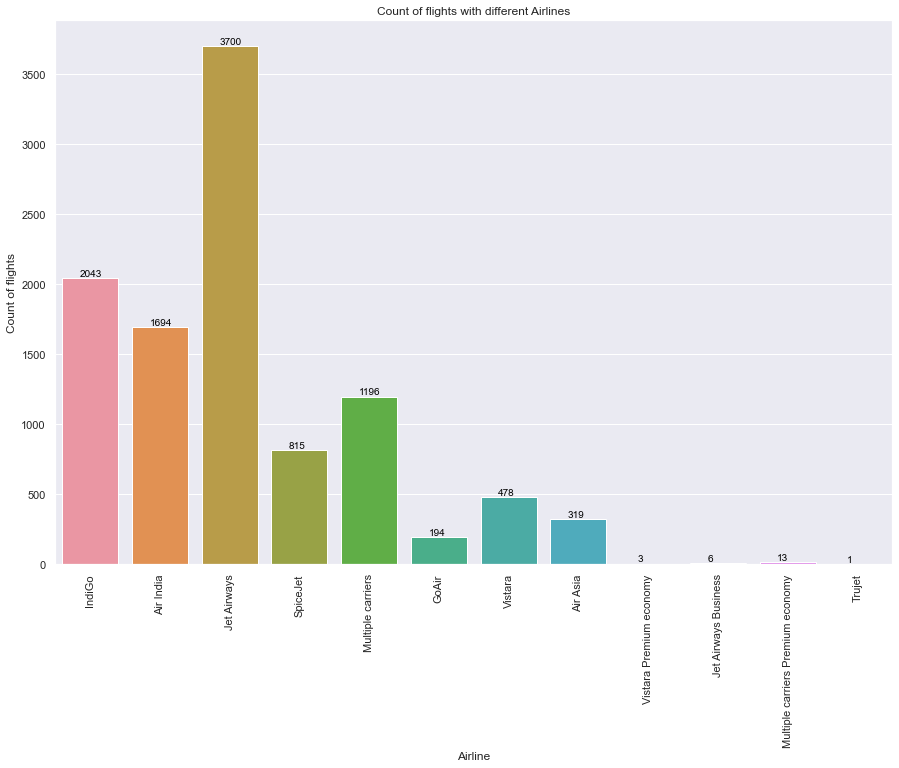

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [23]:
# as Airline is nominal data so we will use onehotencoding
Airline= data_train[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
# for source we use onehotencoding
Source= data_train[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
# for Destination we use onehotencoding
Destination=data_train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
# Additional_info contains 80% if no_info
# Route and Total_stop are related to each other
data_train.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [27]:
data=pd.concat([data_train,Airline,Source,Destination],axis=1)

In [28]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
data.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [30]:
data.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
data.shape

(10462, 29)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Duration                                   10462 non-null  object
 1   Total_Stops                                10462 non-null  object
 2   Price                                      10462 non-null  int64 
 3   Journey_day                                10462 non-null  int64 
 4   Journey_month                              10462 non-null  int64 
 5   dep_hour                                   10462 non-null  int64 
 6   dep_min                                    10462 non-null  int64 
 7   arrival_hour                               10462 non-null  int64 
 8   arrival_min                                10462 non-null  int64 
 9   Airline_Air India                          10462 non-null  uint8 
 10  Airline_GoAir                     

In [33]:
# For overcome DataLeakage we were not combine train and test data at a time , we sepratly
# perform the preprocessing for test data( if we combine it my test data know some information of my train data)


In [34]:
# explore test data set
data_test=pd.read_excel(r'Test_set.xlsx')
pd.set_option('display.max_columns',None)

In [35]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [36]:
# is na value present
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [37]:
# Checking if there are any Duplicate values
data_test[data_test.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


EDA

In [38]:
#.dt.day  method will extract only date
#.dt.month method will extract only month
data_test['Journey_day']=pd.to_datetime(data_test.Date_of_Journey, format='%d/%m/%Y').dt.day
data_test['Journey_month']=pd.to_datetime(data_test.Date_of_Journey, format='%d/%m/%Y').dt.month

In [39]:
# Then we have a Dep_Time , extract value
data_test['dep_hour']=pd.to_datetime(data_test.Dep_Time).dt.hour
# for minutes
data_test['dep_min']=pd.to_datetime(data_test.Dep_Time).dt.minute
# we have to drop Dep_Time column
data_test.drop(['Dep_Time'], axis=1, inplace=True)

In [40]:
# Then we have a 	Arrival_Time , extract value
data_test['arrival_hour']=pd.to_datetime(data_test.Arrival_Time).dt.hour
# for minutes
data_test['arrival_min']=pd.to_datetime(data_test.Arrival_Time).dt.minute
# we have to drop Dep_Time column
data_test.drop(['Arrival_Time'], axis=1, inplace=True)

In [41]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
data_test['Duration']=data_test['Duration'].apply(duration)

In [42]:
#Converting total_stops to 0,1,2,3 and so on..
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
data_test['Total_Stops']=data_test['Total_Stops'].apply(stops)

In [43]:
#Convert No Info in No info because both are same
data_test["Additional_Info"] = data_test["Additional_Info"].replace({'No Info': 'No info'})

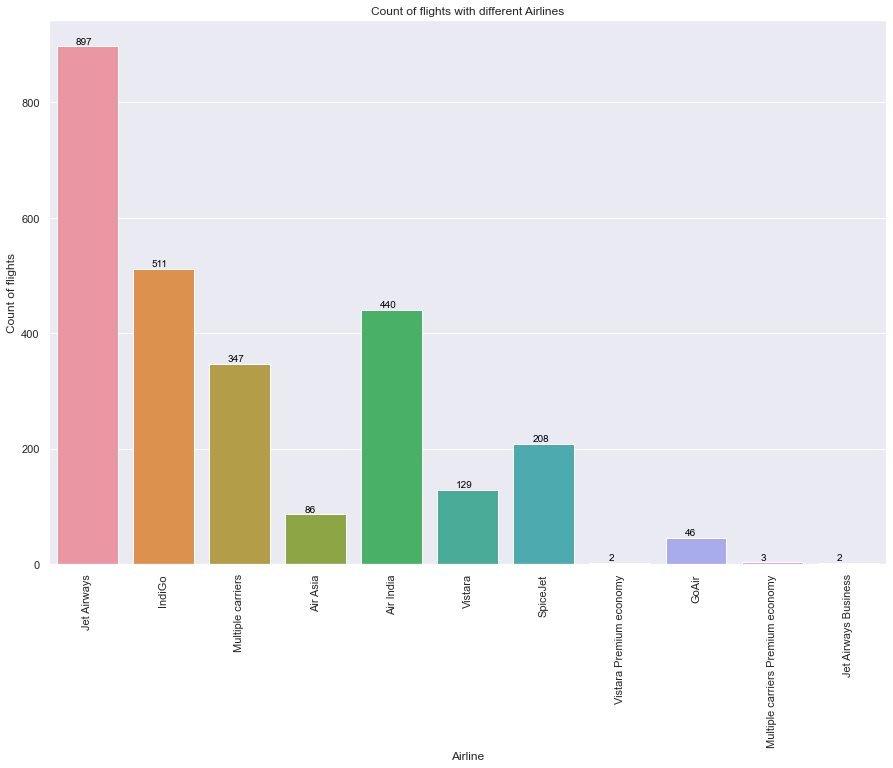

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data_test)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [45]:
# as Airline is nominal data so we will use onehotencoding
Airline= data_test[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [46]:
# for source we use onehotencoding
Source= data_test[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [47]:
# for Destination we use onehotencoding
Destination=data_test[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [48]:
# Additional_info contains 80% if no_info
# Route and Total_stop are related to each other
data_test.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [49]:
df_test=pd.concat([data_test,Airline,Source,Destination],axis=1)

In [50]:
df_test.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [51]:
df_test.shape

(2671, 28)

In [52]:
df_test.columns

Index(['Date_of_Journey', 'Duration', 'Total_Stops', 'Journey_day',
       'Journey_month', 'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [53]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [54]:
df_test.head()

,Date_of_Journey,Duration,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,655,1,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,240,1,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,1425,1,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,780,1,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,170,0,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
df_test.drop(['Date_of_Journey'],axis=1, inplace=True)

In [56]:
df_test.head()

,Duration,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,240,1,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1425,1,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,780,1,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,170,0,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
df_test.shape

(2671, 27)

Feature selection

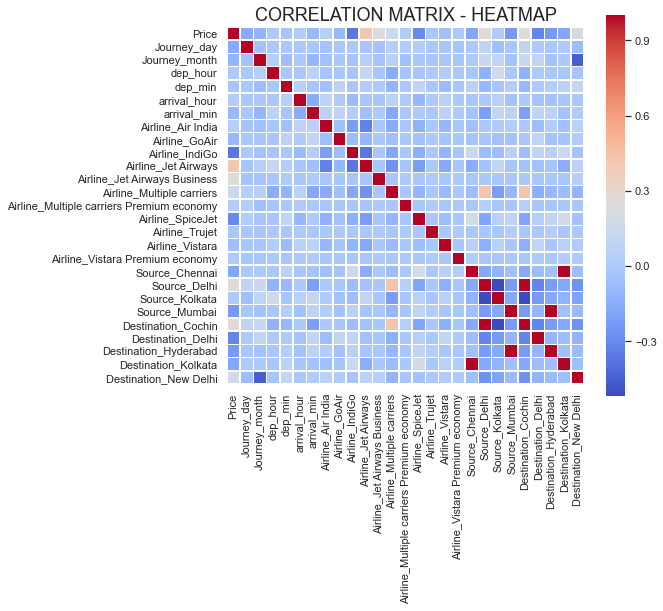

In [58]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [59]:
x=data.loc[:,['Duration', 'Total_Stops', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [60]:
y=data.loc[:,['Price']]

In [61]:
# Important feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
f_selc=ExtraTreesRegressor()
f_selc.fit(x,y)

C:\Users\LoNe WoLf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor()

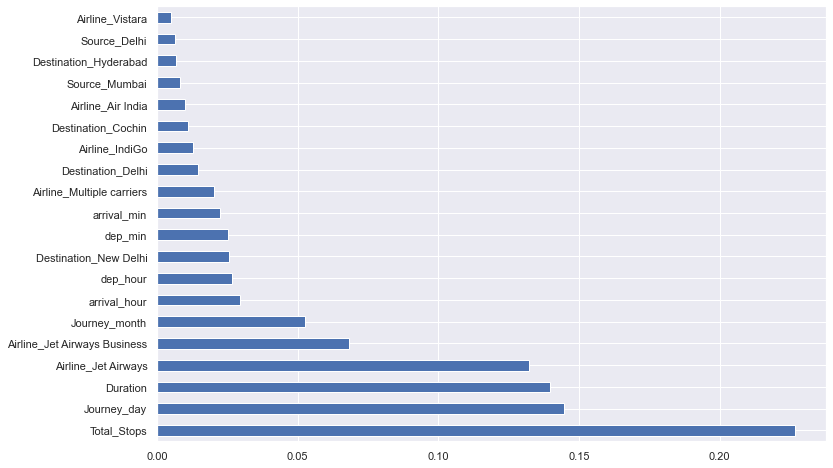

In [62]:
# plot graph
plt.figure(figsize=(12,8))
fe_imp=pd.Series(f_selc.feature_importances_,index=x.columns)
fe_imp.nlargest(20).plot(kind='barh')
plt.show()

In [63]:
from sklearn. model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [64]:
print((train_x).shape)

(7323, 28)


In [65]:
# fitting model by linearregression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [66]:
y_pred=lr.predict(test_x)
lr.score(train_x,train_y)

0.6367819948915289

In [67]:
lr.score(test_x,test_y)

0.5885428251967815

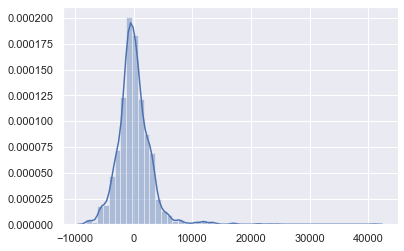

In [68]:
sns.distplot(test_y-y_pred)
plt.show()

In [69]:
# fit model using decision tree
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(random_state=0)
reg.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [70]:
y_pred=reg.predict(test_x)
reg.score(train_x,train_y)

0.9636138788843808

In [71]:
reg.score(test_x,test_y)

0.962846243254991

In [72]:
# We will then build an adaboost ensemble 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [73]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeRegressor(max_depth=2, random_state = 100)

In [74]:
# fit the shallow decision tree 

shallow_tree.fit(train_x, train_y)

# test error
y_pred = shallow_tree.predict(test_x)
shallow_tree.score(test_x,test_y)

0.4248523431574154

In [75]:
shallow_tree.score(test_x,test_y)

0.4248523431574154

In [76]:
# Now, we will see the accuracy using the AdaBoost algorithm.
# adaboost with the tree as base estimator

estimators = list(range(1,50,3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostRegressor(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(train_x, train_y.values.ravel())
    y_pred = ABC.predict(test_x)
    scores=ABC.score(test_x,test_y)
    abc_scores.append(scores)
   
 
    

    

In [77]:
abc_scores

[0.4673298552693501,
 0.494614174681676,
 0.4739276669072112,
 0.4431008939377704,
 0.4418578204439563,
 0.28216914957697814,
 0.27008746790811955,
 0.427252760146949,
 0.2273961259247418,
 0.462679298384186,
 0.27896844069547944,
 0.3102554130790439,
 0.36858754678297845,
 0.17992461315413855,
 0.1185004354816408,
 0.29950467122490565,
 0.1323413467652459]

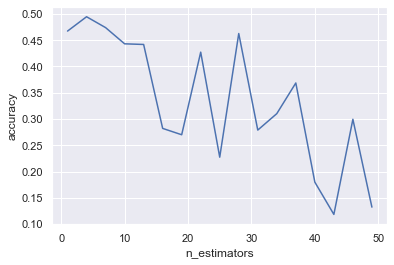

In [78]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [79]:
# we are not getting the good accuracy so we to use RandomForest


RandomForest

In [80]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(train_x,train_y)

C:\Users\LoNe WoLf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [81]:
y_pred=reg_rf.predict(test_x)
reg_rf.score(train_x,train_y)

0.9562796465692853

In [82]:
reg_rf.score(test_x,test_y)

0.8026494872303335

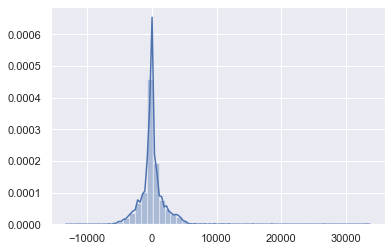

In [83]:

y_pred=y_pred.reshape(3139,1)
sns.distplot(test_y-y_pred)
plt.show()

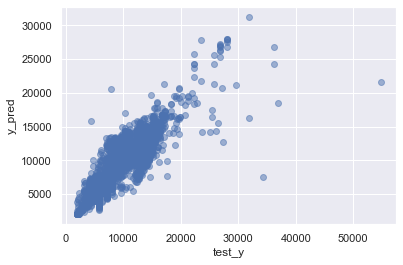

In [84]:
plt.scatter(test_y,y_pred, alpha=0.5)
plt.xlabel('test_y')
plt.ylabel('y_pred')
plt.show()

In [85]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(test_y,y_pred))
print('MSE:',metrics.mean_squared_error(test_y,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(test_y,y_pred)))

MAE: 1188.6062744542546
MSE: 4117650.6547790947
RMSE: 2029.1995108365008


In [86]:
metrics.r2_score(test_y,y_pred)

0.8026494872303335

HYPERPARAMETER TUNING

In [87]:
from sklearn.model_selection import RandomizedSearchCV


In [88]:
# Randomsearch cv
# number of trees in randomforest
n_estimators=[int(x) for x in np.linspace(start= 100, stop=1200, num=12)]
max_features=['auto', 'sqrt']
# maximumlevel of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# mainimum number of samples required at each leafnode
min_samples_leaf=[1,2,5,10]


In [89]:
# create random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [90]:
rf_random=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=10,verbose=2,random_state=100,n_jobs=1)

In [91]:
rf_random.fit(train_x,train_y.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  27.6s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  30.7s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  27.6s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  25.5s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  25.3s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  26.1s
[CV] n_estimators=900, min_samples_split=15

[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=  50.4s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=  50.9s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=  54.4s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=  50.1s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=  46.2s
[CV] n_estimators=1100, min_samples_split=2

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   5.5s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   8.6s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   8.5s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   8.5s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   8.4s
[CV] n_estimators=600, min_samples_split=1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 24.9min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [93]:
prediction=rf_random.predict(test_x)

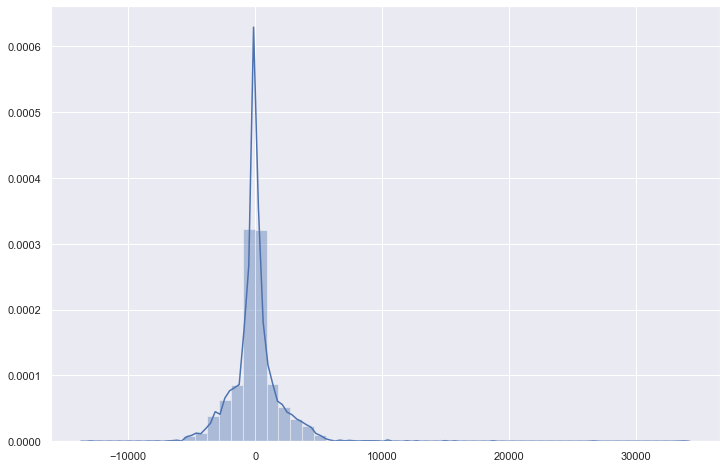

In [94]:
prediction=prediction.reshape(3139,1)
plt.figure(figsize=(12,8))
sns.distplot(test_y-prediction)
plt.show()

In [95]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(test_y,prediction))
print('MSE:',metrics.mean_squared_error(test_y,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(test_y,prediction)))

MAE: 1185.7892302332116
MSE: 4135726.5939099914
RMSE: 2033.648591549187


In [96]:
metrics.r2_score(test_y,prediction)

0.8017831447075322

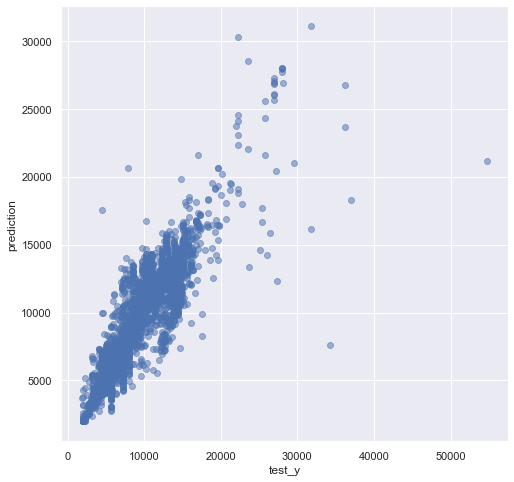

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(test_y,prediction, alpha=0.5)
plt.xlabel('test_y')
plt.ylabel('prediction')
plt.show()

Save Our Model

In [101]:
import pickle
file=open('flight_random_forest.pkl','wb')
pickle.dump(rf_random,file)

In [102]:
model=open('flight_random_forest.pkl','rb')
forest=pickle.load(model)

In [103]:
y_prediction=forest.predict(test_x)


In [104]:
metrics.r2_score(test_y,y_prediction)

0.8017831447075322